I Sam Holmes did the entirety of this project, My partner Mathew did not contribute to this project in any way. Even simple task like making a graph once everything was done he was unable to do. Normally I would be fine with this, but it was a massive stress and huge time suck during finals week. 

In this Notebook we are exploring the use of Monte Carlo Markov Chains(MCMC). This is a way to create a PDF(Probability Density Function) of a function, or evaluate the sensitivity of a model to specific parameters. This notebook provides the simple example of a MCMC being used on a 3D Gaussian distribution to show how it creates a PDF.

This chunk imports the packages and libaries that we will need to use within the notebook.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go

Now we graph and define the function to get an idea of what we are working with. We will later be using MCMC methods to create a PDF of this function. Notice that the peak of the function is at (3,1) and that the function is symmetric about the peak. The function for a 2D Gaussian distribution is given by:
$$10*exp(\frac{−(x−3)^2}{5}+\frac{−(y−1)^2}{10})$$

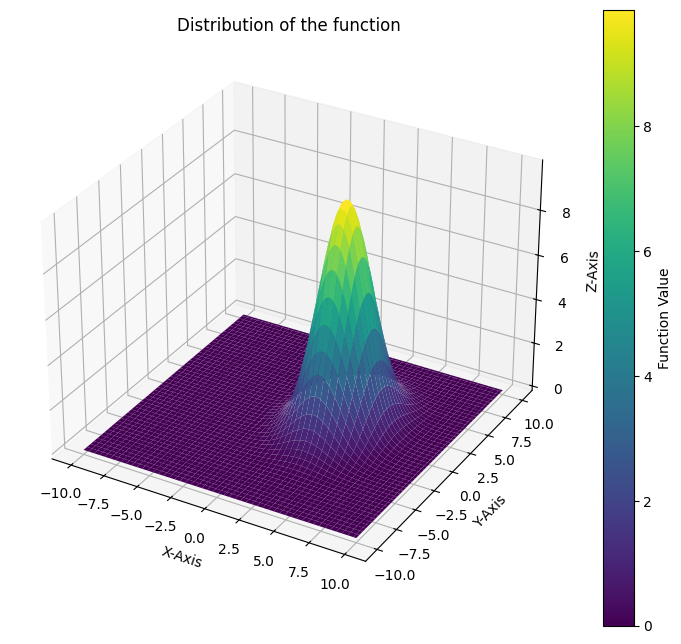

In [10]:
#This is the function we are graphing
def f(x, y):
    return 10 * np.exp((-((x - 3)**2))/5 + ((-(y - 1)**2)/10))

#Gets us our x values and our y values
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

#This is the cartesian product of the two arrays
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

#This graphs the function in the 3D space
fig = plt.figure(figsize=(9, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis')
fig.colorbar(surf, ax=ax, label='Function Value')
ax.set_xlabel('X-Axis')
ax.set_ylabel('Y-Axis')
ax.set_zlabel('Z-Axis')
ax.set_title('Distribution of the function')
plt.show()

Now we are create actual walker itself. In this example we place the walker at a specific point, but it will work when placed at any point given enough time. The walker takes "steps" by randomly proposing points around it and then evaluating the function at that point. If the function evaluted at the new point is greater than the the function at the old pointold point, the walker will move to that new point. 

If the function at the new point results in a greater value from the function, the walker will automatically move to the new point. If the new point results in a lesser value from the function, the walker will move to the new point with a probability of $\frac{new}{old}$. This means given enough time the walker will gravitate towards the peak of the function, but could still hypothetically visit every point. Given enough time the walker will gravitate toward the peak of the function. But the walker still has a chance to every single point. This means it will visit the higher points more and lower points less. We can use the proportion of time spent at each of these points to create a PDF of the function. 

A PDF is a probability distribution function is simple a map of where the walker spent the most time. In this situation it should be a smaller version of the original function with an area underneath the curve of 1. The time a walker spent at this point can tell us its relative height.

In this next code chunk we define and run the walker. We start the walker at (0,0) and run it for 5000 steps. We then plot the results of the walker. 

In [4]:
import seaborn as sns
#a function to return a point around the walker. Which is used to propose a new state
def proposal_distribution(mean, std):
    return np.random.normal(mean, std)

#This is the allows the walker to move around by proposing new states.
def metropolis_hastings(target, proposal, initial_state, num_steps):
    current_state = initial_state[0], initial_state[1],target(initial_state[0],initial_state[1])

    #This is a list containing the locations that the walker has visited
    samples = [current_state]

    
    for i in range(num_steps):
        # Propose a new state randomly around 
        proposed_state = proposal((current_state[0],current_state[1]), std=0.5)  # Adjust std as needed


        acceptance_ratio = min(1, target(proposed_state[0],proposed_state[1]) / target(current_state[0],current_state[1]))

        # Accept or reject the proposed state
        if np.random.rand() < acceptance_ratio:
            current_state = proposed_state[0],proposed_state[1],target(proposed_state[0],proposed_state[1])

        samples.append(current_state)

    return np.array(samples)

# Number of MCMC steps
num_steps = 5000

# Initial state
initial_state = (0, 0)  # Initial x, y coordinates

# Run Metropolis-Hastings sampler
samples = metropolis_hastings(f, proposal_distribution, initial_state, num_steps)


Next we create a KDE of where the walker has stepped on the x-axis and y-axis. Notice how this resembles a scaled down version of the z values of the function we are using. This is because the walker is more likely to be in areas where the function is higher and less likely to be at points where the function is lower. It should resemble the function more and more as the number of steps increases.

/var/folders/b5/jqnd0ktj68gcq3l3764mxkz80000gn/T/ipykernel_3690/522934605.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x='x', y='y', cmap='viridis', shade=True,cbar=True)


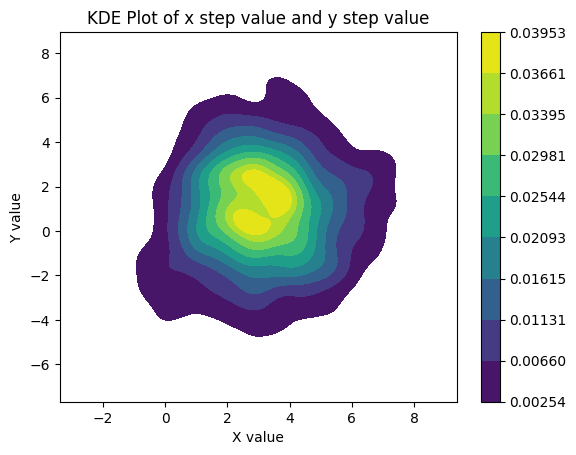

In [5]:
# Extract x and y coordinates from samples
x_samples = samples[:,0]
y_samples = samples[:,1]
z_samples = samples[:,2]

#Makes a KDE plot of the walkers locations
data = pd.DataFrame({'x': x_samples, 'y': y_samples})
sns.kdeplot(data=data, x='x', y='y', cmap='viridis', shade=True,cbar=True)
plt.title('KDE Plot of x step value and y step value')
plt.xlabel('X value')
plt.ylabel('Y value')

plt.show()


In this graph it is not very obvious but there is a time period before the walker reaches the top of the 'hill'. This is seen as the sharp increase in the first 100 steps. This is known as the burn in period and will be more obvious in later problems. 
The burn in period is the time it takes for the walker to reach the peak of the function. This is important because the walker is not at the peak of the function at the start, thus the spread of the walkers step will not be accurate until the walker reaches the peak. This is why for the remainder of the notebook we will be ignoring the first 100 steps of the walker.

Text(0, 0.5, 'X Value')

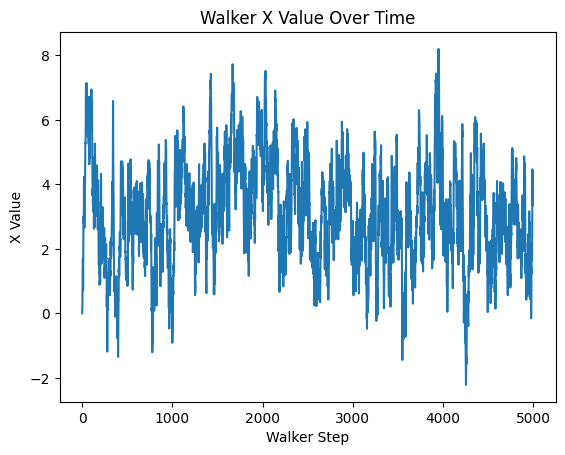

In [6]:
#Need to find the burn in point
plt.plot(x_samples)
plt.title('Walker X Value Over Time')
plt.xlabel('Walker Step')
plt.ylabel('X Value')

Next we examined the distribution of x and y positions of the walker. Notice how this resembles a scaled down version the x cross section and y cross section of the center of the function. This is because the walker spends more time at higher points 

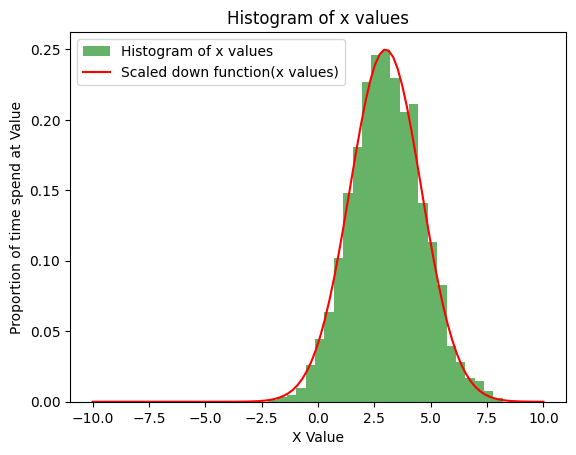

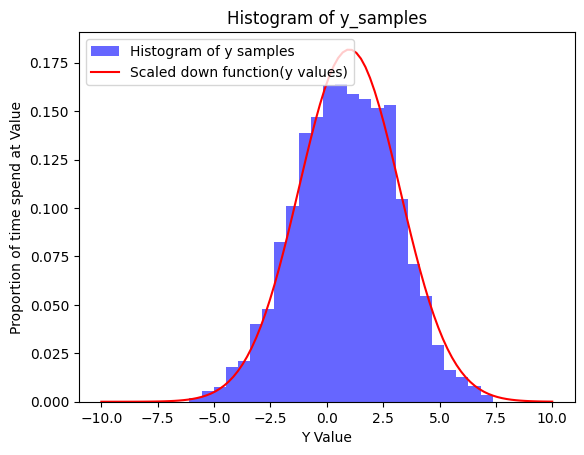

In [9]:
plt.hist(x_samples[200:], bins=25, density=True, alpha=0.6, color='g',label='Histogram of x values')
plt.title('Histogram of x values')
plt.xlabel('X Value')
plt.ylabel('Proportion of time spend at Value')
y_lock=1
x_moving=np.linspace(-10,10,100)
z_result=[]
for x in x_moving:
    z_result.append(f(x,y_lock)/40)
plt.plot(x_moving,z_result,label='Scaled down function(x values)',color='red')
plt.legend()
plt.show()
plt.hist(y_samples[200:], bins=25, density=True, alpha=0.6, color='b',label='Histogram of y samples')
plt.xlabel('Y Value')
plt.ylabel('Proportion of time spend at Value')
plt.title('Histogram of y_samples')
x_lock=3
y_moving=np.linspace(-10,10,100)
z_result=[]
for y in y_moving:
    z_result.append(f(x_lock,y)/55)
plt.plot(y_moving,z_result,color='red',label='Scaled down function(y values)')
plt.legend()
